In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn.cluster import MeanShift, KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, scale
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples
import re
import seaborn as sns

In [14]:
pd.set_option('display.max_columns', 100)

In [20]:
df = pd.read_csv('C:/Users/jbachlombardo/Documents/Community Colleges/Data/working_associates_+chetty.csv')

In [21]:
drop = ['Unnamed: 0', 'Address', 'Website', 'Type', 'Awards offered',
       'Campus setting', 'Campus housing', 'Student population',
       'Undergraduate students', 'Graduation Rate', 'Cohort Year *', 'Net Price **', 'Largest Program', 'IPEDS ID',
       'OPE ID', 'State', 'Zip', 'County', 'region', 'state', 'fips', 'cz', 'czname', 'cfips', 'zip',
       'tier', 'tier_name', 'type', 'iclevel', 'public', 'barrons',
       'multi', 'hbcu', 'flagship', 'sat_avg_2013', 'sat_avg_2001', 'scorecard_rej_rate_2013', 'endowment_pc_2000']

In [22]:
cc = df.drop(drop, axis = 1)

In [23]:
cc = cc.dropna()

In [24]:
cc.shape

(389, 46)

In [27]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 7 to 528
Data columns (total 46 columns):
Name                                       389 non-null object
Transfer-Out Rate                          389 non-null int64
Less than one year certificate             389 non-null int64
One but less than two years certificate    389 non-null int64
Associate's degree                         389 non-null int64
Two but less than 4 years certificate      389 non-null int64
City: Large                                389 non-null int64
City: Midsize                              389 non-null int64
City: Small                                389 non-null int64
Rural: Distant                             389 non-null int64
Rural: Fringe                              389 non-null int64
Rural: Remote                              389 non-null int64
Suburb: Large                              389 non-null int64
Suburb: Midsize                            389 non-null int64
Suburb: Small             

In [26]:
cc.iloc[:, 1] = cc.iloc[:, 1].apply(lambda x: int(re.findall('\d+', x)[0]))

In [52]:
# cc.iloc[:, 3] = cc.iloc[:, 3].apply(lambda x: int(re.findall('(?:[,\d]+.?\d*)', x)[0].replace(',', '')))

In [208]:
X = cc.iloc[:, 1:]

In [344]:
ms = Pipeline([('scale', StandardScaler()),
             ('cluster', MeanShift())])

In [345]:
blobs = ms.fit_predict(X_weighted)

In [346]:
blobber = cc.copy()

In [347]:
blobber['Blobs'] = blobs
blobber['Blobs'].value_counts().sort_index()

0     367
1       5
2       2
3       1
4       2
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      4
13      1
Name: Blobs, dtype: int64

In [348]:
blob_corr = pd.concat([blobber, pd.get_dummies(blobber['Blobs'])], axis = 1)

In [349]:
blob_corr = blob_corr.drop('Blobs', axis = 1)

In [350]:
blobber.groupby('Blobs').mean()

,Transfer-Out Rate,Less than one year certificate,One but less than two years certificate,Associate's degree,Two but less than 4 years certificate,City: Large,City: Midsize,City: Small,Rural: Distant,Rural: Fringe,Rural: Remote,Suburb: Large,Suburb: Midsize,Suburb: Small,Town: Distant,Town: Fringe,Town: Remote,N_neighbors,AA_jobs,exp_instr_pc_2000,exp_instr_pc_2013,ipeds_enrollment_2013,ipeds_enrollment_2000,sticker_price_2013,sticker_price_2000,grad_rate_150_p_2013,grad_rate_150_p_2002,avgfacsal_2013,avgfacsal_2001,scorecard_netprice_2013,scorecard_median_earnings_2011,exp_instr_2012,exp_instr_2000,asian_or_pacific_share_fall_2000,black_share_fall_2000,hisp_share_fall_2000,alien_share_fall_2000,pct_arthuman_2000,pct_business_2000,pct_health_2000,pct_multidisci_2000,pct_publicsocial_2000,pct_stem_2000,pct_socialscience_2000,pct_tradepersonal_2000
Blobs,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.934605,0.940054,1.0,1.0,0.171662,0.040872,0.081744,0.155313,0.079019,0.190736,0.021798,0.114441,0.029973,0.027248,0.122616,0.021798,0.114441,1.841962,30900.495913,2627.001535,3368.646374,6300.708447,4769.00,3837.608605,1852.106975,0.216671,0.249054,5950.906682,43636.458928,6168.03861,28663.215259,1.988821e+07,1.158960e+07,0.016529,0.128051,0.055497,0.006535,1.475416,20.608955,23.644385,25.167547,5.289337,9.454874,2.610831,11.748655
1,17.800000,1.000000,1.0,1.0,0.400000,0.200000,0.400000,0.200000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,834779.200000,2007.366660,2932.158100,18328.400000,17323.40,2583.600000,1067.200000,0.206045,0.292011,8412.000000,64236.610713,4198.00000,32280.000000,5.115484e+07,3.423432e+07,0.197034,0.046501,0.227558,0.026959,3.467308,25.656597,18.029373,32.368944,3.175392,7.022746,3.103781,7.175861
2,17.000000,0.500000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,1.000000,3189.500000,1715.198050,3090.179200,3464.500000,2361.50,3424.500000,1365.000000,0.203631,0.217544,4476.000000,36485.688889,6592.00000,29200.000000,7.846635e+06,4.401221e+06,0.005127,0.042470,0.020198,0.006411,2.156116,25.857450,14.081737,26.136001,1.599013,12.699079,17.470603,0.000000
3,1.000000,0.000000,1.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,84690.000000,1817.864600,7108.909700,1105.000000,551.00,12757.938000,7925.020000,0.358617,0.506339,4818.424300,32849.188984,20857.21700,32200.000000,2.910031e+06,5.406882e+05,0.005445,0.165154,0.036298,0.000000,40.740742,18.930042,6.172840,0.000000,3.292181,20.164610,10.699589,0.000000
4,20.500000,1.000000,1.0,1.0,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,126828.500000,3688.442500,5602.417350,25186.000000,19252.50,3937.500000,1909.500000,0.161066,0.190053,8238.500000,60716.012843,7620.50000,31800.000000,1.225722e+08,7.485651e+07,0.055861,0.142041,0.050711,0.009658,3.092843,25.776354,20.246764,19.733350,6.544804,5.168788,0.778009,18.659087
5,38.000000,0.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3602.000000,2223.214400,2786.682100,1428.000000,1267.00,5058.000000,1816.000000,0.252567,0.335505,6156.000000,47446.171429,8252.00000,32100.000000,3.919893e+06,2.911103e+06,0.030781,0.200474,0.023678,0.007893,0.000000,8.056872,0.000000,2.843602,0.000000,89.099525,0.000000,0.000000
6,22.000000,1.000000,1.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,576715.000000,2004.003900,2008.017600,57978.000000,40929.00,3358.000000,1416.000000,0.111293,0.098952,6629.000000,45704.971467,8191.00000,32700.000000,1.160960e+08,7.924623e+07,0.141929,0.237631,0.268954,0.013780,1.432958,22.517912,19.396111,28.812691,6.345957,6.601842,0.051177,14.8413

In [351]:
silhouette_score(X_weighted, blobs)

-0.7452651132798994

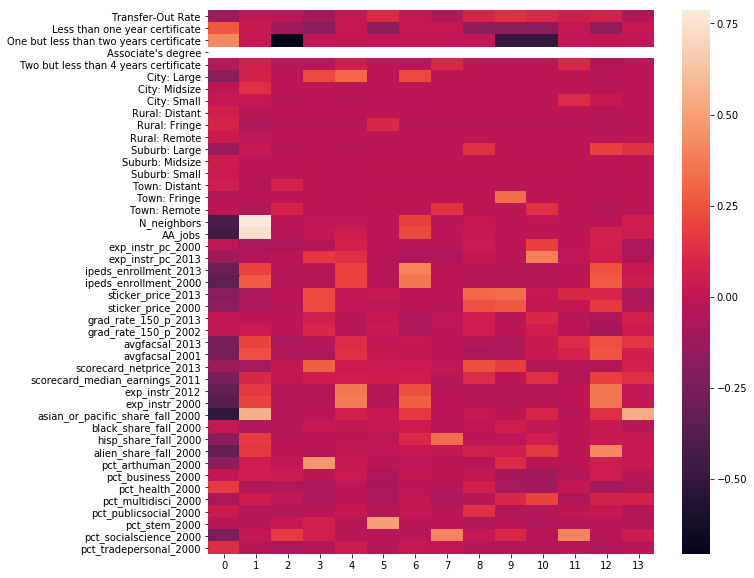

In [352]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(blob_corr.corr().iloc[:-len(np.unique(blobs)),-len(np.unique(blobs)):], ax = ax)

In [355]:
silhouettes = {}
for n in np.arange(3, 11) :
    pipe = Pipeline([('scale', StandardScaler()),
             ('cluster', KMeans(n_clusters = n))])
    pipe_groups = pipe.fit_predict(X_weighted)
    silhouettes[n] = silhouette_score(X_weighted, pipe_groups)

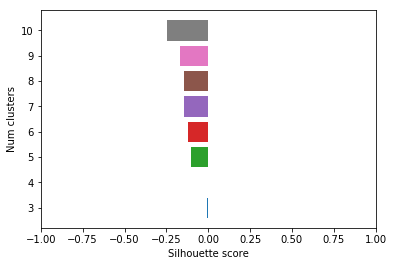

In [356]:
fig, ax = plt.subplots()
for k, v in silhouettes.items() :
    ax.barh(k, v)
ax.set_xlim(-1, 1)
ax.set_ylabel('Num clusters')
ax.set_xlabel('Silhouette score')
plt.show()

In [357]:
sample_weights_kmeans = np.ones(len(X.columns))
sample_weights_kmeans[5:17] = 1/len(X.columns[5:17])
X_weighted = X * sample_weights_kmeans

In [371]:
k_model = Pipeline([('scale', StandardScaler()),
             ('cluster', KMeans(n_clusters = 8))])

In [372]:
k_groups = k_model.fit_predict(X_weighted)

In [373]:
kgroups = cc.copy()

In [374]:
kgroups['Groups'] = k_groups
kgroups['Groups'].value_counts().sort_index()

0      6
1     53
2     41
3     57
4      5
5    121
6     61
7     45
Name: Groups, dtype: int64

In [375]:
k_corr = pd.concat([kgroups, pd.get_dummies(kgroups['Groups'])], axis = 1)

In [376]:
k_corr = k_corr.drop('Groups', axis = 1)

In [377]:
kgroups.groupby('Groups').mean()

,Transfer-Out Rate,Less than one year certificate,One but less than two years certificate,Associate's degree,Two but less than 4 years certificate,City: Large,City: Midsize,City: Small,Rural: Distant,Rural: Fringe,Rural: Remote,Suburb: Large,Suburb: Midsize,Suburb: Small,Town: Distant,Town: Fringe,Town: Remote,N_neighbors,AA_jobs,exp_instr_pc_2000,exp_instr_pc_2013,ipeds_enrollment_2013,ipeds_enrollment_2000,sticker_price_2013,sticker_price_2000,grad_rate_150_p_2013,grad_rate_150_p_2002,avgfacsal_2013,avgfacsal_2001,scorecard_netprice_2013,scorecard_median_earnings_2011,exp_instr_2012,exp_instr_2000,asian_or_pacific_share_fall_2000,black_share_fall_2000,hisp_share_fall_2000,alien_share_fall_2000,pct_arthuman_2000,pct_business_2000,pct_health_2000,pct_multidisci_2000,pct_publicsocial_2000,pct_stem_2000,pct_socialscience_2000,pct_tradepersonal_2000
Groups,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24.666667,0.166667,0.333333,1.0,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.166667,0.166667,0.333333,1.833333,36555.833333,2865.602400,5473.447217,1672.166667,1158.833333,9481.823000,5114.336667,0.280436,0.320263,4972.904050,36645.816981,11950.702833,32583.333333,4.954963e+06,2.557310e+06,0.024660,0.135695,0.050101,0.018149,9.418551,15.909258,12.585092,38.393188,4.263520,8.635461,10.794931,0.000000
1,17.547170,1.000000,1.000000,1.0,0.301887,0.301887,0.415094,0.018868,0.018868,0.037736,0.000000,0.000000,0.113208,0.075472,0.018868,0.000000,0.000000,2.867925,65810.735849,2346.215866,3180.263783,14475.584906,11294.056604,3178.924528,1374.528302,0.168804,0.188552,6613.169811,49148.911414,6489.981132,30224.528302,4.559769e+07,2.635214e+07,0.033882,0.125871,0.116793,0.013177,2.955923,18.903287,23.394352,27.308313,6.658906,9.793770,2.743838,8.241612
2,20.121951,0.829268,1.000000,1.0,0.121951,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.073171,3668.756098,2577.985568,3505.009651,2770.560976,2298.024390,3323.609756,1551.414634,0.289251,0.321121,5191.780488,38650.265498,6157.341463,29048.780488,9.142598e+06,5.894582e+06,0.008068,0.068326,0.081614,0.005912,2.424944,16.773739,22.479353,26.757484,3.758990,9.612144,6.701356,11.491990
3,18.684211,0.964912,1.000000,1.0,0.175439,0.000000,0.000000,0.894737,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105263,0.000000,1.543860,25226.087719,2510.764582,3354.947379,5446.491228,4228.649123,3916.578947,1904.122807,0.196506,0.207319,6147.368421,44041.498190,6357.473684,28933.333333,1.795924e+07,1.073828e+07,0.015716,0.093726,0.054125,0.006465,1.087446,19.373345,24.967153,24.651492,6.394927,9.611365,2.795794,11.118478
4,15.600000,1.000000,1.000000,1.0,0.400000,0.400000,0.400000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,36.200000,830020.400000,1945.015240,2514.619040,27750.800000,23199.000000,1608.400000,533.000000,0.199552,0.290348,7781.200000,59870.939335,4872.600000,31120.000000,6.537158e+07,4.509900e+07,0.193543,0.086045,0.268986,0.029715,3.683353,25.433548,16.335403,31.112081,3.950756,7.073274,3.114017,9.297570
5,19.157025,0.933884,1.000000,1.0,0.082645,0.000000,0.000000,0.000000,0.123967,0.421488,0.066116,0.033058,0.008264,0.041322,0.305785,0.000000,0.000000,1.190083,9382.198347,2412.391346,3122.299635,3885.727273,2934.066116,4142.515355,2072.489752,0.215456,0.248644,5964.750020,42563.440960,5897.075784,27876.859504,1.162685e+07,6.755913e+06,0.009540,0.090491,0.044810,0.003564,0.909362,19.530889,23.503227,29.935224,4.960326,10.890583,2.364133,7.906255
6,12.770492,0.967213,1.000000,1.0,0.409836,0.016393,0.114754,0.032787,0.213115,0.278689,0.000000,0.081967,0.065574,0.016393,0.114754,0.032787,0.032787,1.393443,17203.557377,3668.409185,4112.489805,3527.737705,2276.704918,3045.065574,1215.508197,0.254947,0.325115,5092.721311,39763.875010,6119.704918,25557.377049,1.322389e+07,8.171503e+06,0.011766,0.287898,0.012138,0.001506,0.5293

In [378]:
silhouette_score(X_weighted, k_groups)

-0.20182332613954204

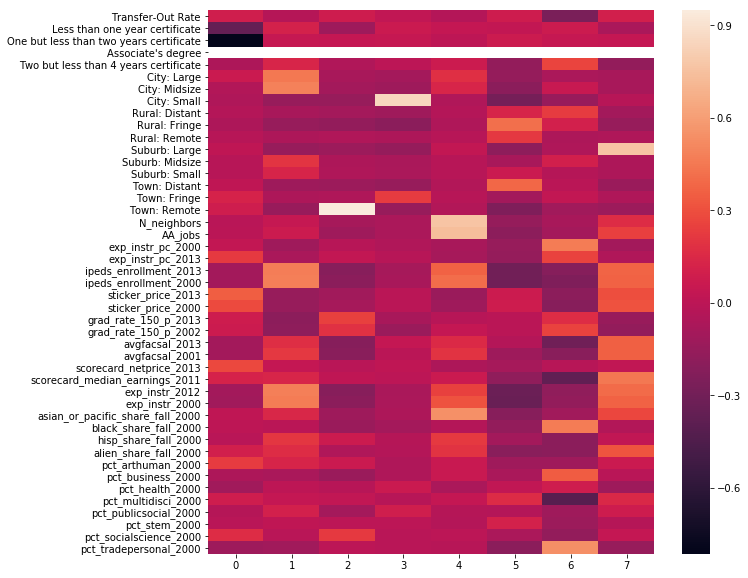

In [379]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(k_corr.corr().iloc[:-len(np.unique(k_groups)),-len(np.unique(k_groups)):], ax = ax)

In [380]:
tsne_array = scale(X)

In [381]:
tsne_model = TSNE(learning_rate = 100)

In [382]:
plot_samples = tsne_model.fit_transform(tsne_array)

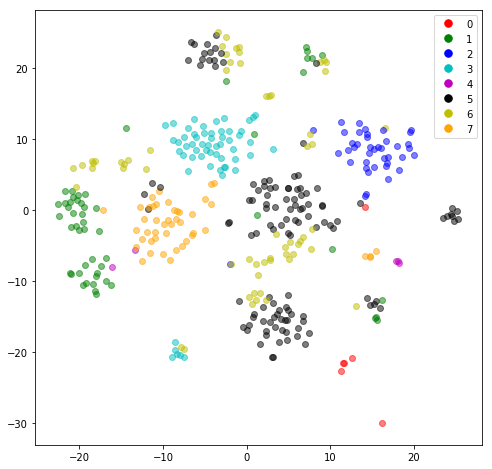

In [383]:
fig, ax = plt.subplots(figsize = (8, 8))
labels = k_groups #blobs
legend_labels = np.unique(labels)
mark = 15
colors = ['r', 'g', 'b', 'c', 'm', 'k', 'y', 'orange', 'crimson', 'magenta', 'darkgrey', 'tan', 'lightpink', 'lime']
handles_dict = {}
for i in range(len(legend_labels)) :
    k = 'dot_' + str(i)
    handles_dict[k] = mlines.Line2D([], [], linestyle = 'None', color=colors[legend_labels[i]], marker='.', markersize=mark, label=legend_labels[i])
for i in range(len(samples)) :
    ax.scatter(plot_samples[i, 0], plot_samples[i, 1], c = colors[labels[i]], alpha = 0.5)
plt.legend(handles=[v for k, v in handles_dict.items()])
plt.show()